In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('train.csv')
df.head()
df.size

118260

DEALING WITH NULL VALUES

In [4]:
l=(df.Alley.size-df.count())
l.sort_values(ascending=False)
l=pd.DataFrame(l,columns=['null_count'])

In [5]:
ze=df[df.isin([0])]
ze=ze.count().sort_values(ascending=False)
ze[ze.values>0]

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageCars         81
GarageArea         81
TotalBsmtSF        37
FullBath            9
BedroomAbvGr        6
KitchenAbvGr        1
dtype: int64

In [6]:
ind=['PoolArea','3SsnPorch','LowQualFinSF',     
'MiscVal',          
'BsmtHalfBath', 'ScreenPorch',      
'BsmtFinSF2',       
'EnclosedPorch','HalfBath'] 

In [7]:
z=l[l.values>0]
z.sort_values(by='null_count',ascending=False)

,null_count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [8]:
nulls=l[l.values>0].index
nulls

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
sns.set_style('whitegrid')

In [10]:
for x in df.columns:
    if df[x].dtype !='object':
        df[x].fillna(df[x].mean(),inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


VIZUALIZING DATA DISTRIBUTIONS AND KEY RELATIONS:

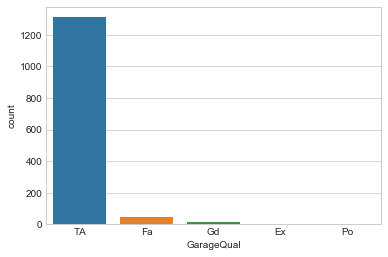

In [12]:
sns.countplot(x=df.GarageQual)

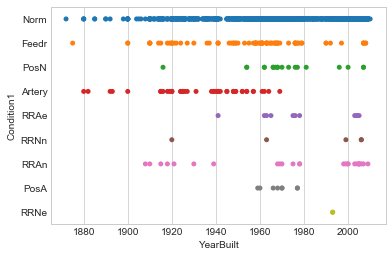

In [13]:
sns.stripplot(x=df.YearBuilt,y=df.Condition1)

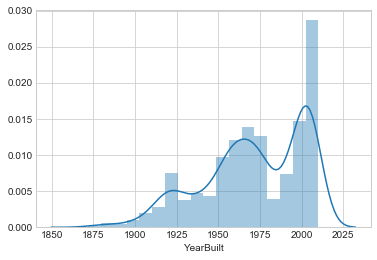

In [14]:
sns.distplot(df.YearBuilt)

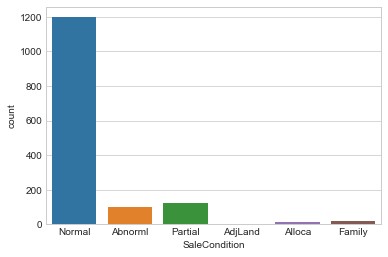

In [15]:
sns.countplot(x=df.SaleCondition)

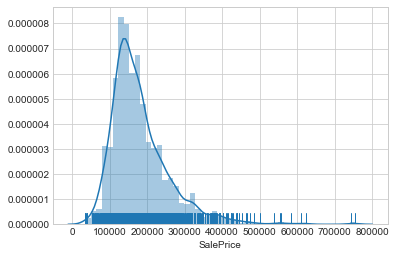

In [16]:
sns.distplot(df.SalePrice,rug=True)

LOG TRANSFORMING DATA:

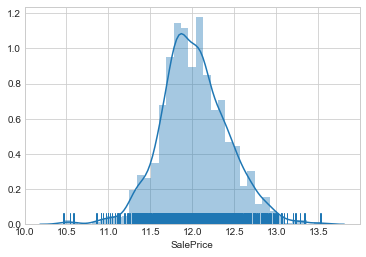

In [17]:
sns.distplot(np.log1p(df.SalePrice),rug=True)
#sns.distplot(df.LotArea)

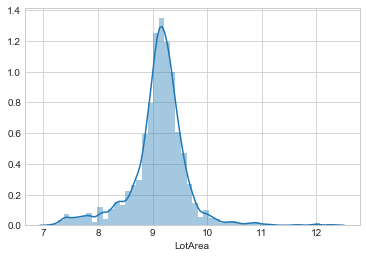

In [18]:
sns.distplot(np.log1p(df.LotArea))

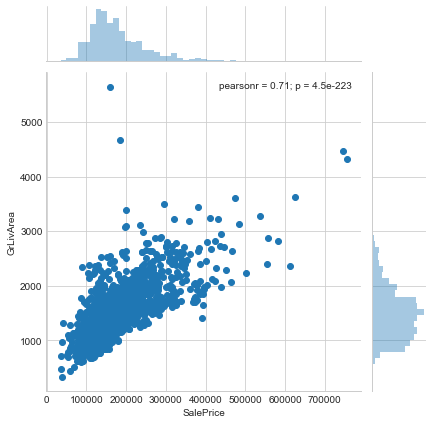

In [19]:
sns.jointplot(x=df.SalePrice,y=df.GrLivArea)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

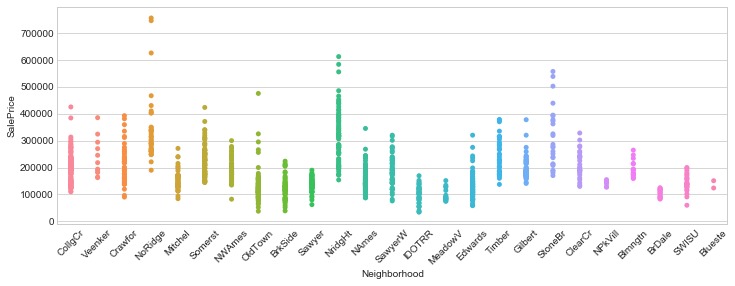

In [20]:
pl=plt.figure(figsize=(12,4))
sns.stripplot(df.Neighborhood,df.SalePrice)
plt.xticks(rotation=45)

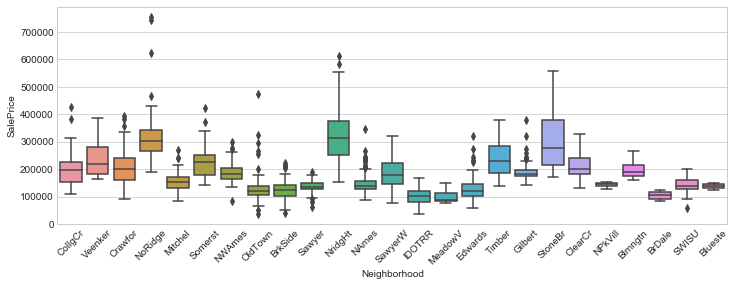

In [21]:
pl=plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.boxplot(df.Neighborhood,df.SalePrice)


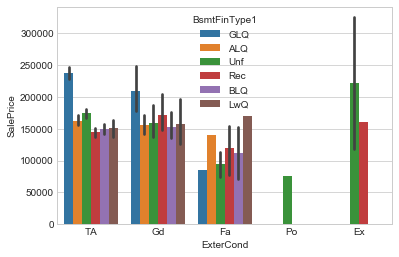

In [22]:
sns.barplot(df.ExterCond,df.SalePrice,hue=df.BsmtFinType1)

In [23]:
#sns.jointplot()
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
df=df.drop(labels=['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu','PoolArea','3SsnPorch','LowQualFinSF',     
'MiscVal',          
'BsmtHalfBath', 'ScreenPorch',      
'BsmtFinSF2',       
'EnclosedPorch','HalfBath'],axis=1)

DEALING WITH CATEGORICAL VARIABLES:

In [26]:
df=pd.get_dummies(df)

DEALING WITH NUMERICAL DATA:

In [27]:
#df.astype(np.float)
df.MasVnrArea.replace(to_replace=0,value=df.MasVnrArea.mean(),inplace=True)
df.Fireplaces.replace(to_replace=0,value=df.Fireplaces.mean(),inplace=True)
df.BsmtFinSF1.replace(to_replace=0,value=df.BsmtFinSF1.mean(),inplace=True)
df['2ndFlrSF'].replace(to_replace=0.0,value=df['2ndFlrSF'].mean(),inplace=True)
df.WoodDeckSF.replace(to_replace=0,value=df.WoodDeckSF.mean(),inplace=True)
df.OpenPorchSF.replace(to_replace=0,value=df.OpenPorchSF.mean(),inplace=True)
df.BsmtFullBath.replace(to_replace=0,value=df.BsmtFullBath.mean(),inplace=True)

df_i=df.select_dtypes(include=['int64'])
df_i[df_i.isin([0,0.0])].columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
x=df.drop(labels='SalePrice',axis=1)
y=df['SalePrice']

In [29]:
y=np.log1p(y)

DIMESNSIONALITY REDUCTION:

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=70)
x1=pca.fit_transform(x)
x=pd.DataFrame(x1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


MODELLING USING DIFFERENT ML ALGORITHMS:

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report


In [52]:
r=RandomForestRegressor()
grid={'n_estimators':[300],'max_depth':[10,25]}
gr=GridSearchCV(r,grid,cv=10)


In [53]:
gr.fit(x_train,y_train)
y_p=gr.predict(x_test)

In [54]:
print(np.sqrt(mean_squared_error(y_test,y_p)))
print(gr.best_params_)
gr.best_estimator_

0.180939150849
{'max_depth': 25, 'n_estimators': 300}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [56]:
grid={'n_estimators':[50,100,150,300],'learning_rate':[0.1,0.01]}
gr=GridSearchCV(gb,grid,cv=10)


In [57]:
gr.fit(x_train,y_train)
y_p=gr.predict(x_test)

In [58]:
print(np.sqrt(mean_squared_error(y_test,y_p)))
print(gr.best_params_)
gr.best_estimator_

0.151180890825
{'learning_rate': 0.1, 'n_estimators': 300}


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [59]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [60]:
grid={'n_estimators':[50,100,200,300],'learning_rate':[0.1,0.01,0.001]}
gr=GridSearchCV(ad,grid,cv=10)

In [61]:
gr.fit(x_train,y_train)
y_p=gr.predict(x_test)

In [62]:
print(np.sqrt(mean_squared_error(y_test,y_p)))
print(gr.best_params_)
gr.best_estimator_

0.219996958756
{'learning_rate': 0.1, 'n_estimators': 300}


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=300, random_state=None)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor()


In [64]:
grid={'n_neighbors':[3,5,10,20]}
gr=GridSearchCV(k,grid,cv=10)


In [65]:
gr.fit(x_train,y_train)
y_p=gr.predict(x_test)

In [66]:
print(np.sqrt(mean_squared_error(y_test,y_p)))
print(gr.best_params_)
gr.best_estimator_

0.243896199843
{'n_neighbors': 10}


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')